Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-31 00:49:50--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.131.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.131.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’

instacart_online_gr 100%[===================>] 196.03M  76.4MB/s    in 2.6s    

2019-10-31 00:49:53 (76.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [0]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [0]:
# which columns do we need?

In [8]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# we need order_id and product_id.

In [10]:
num_orders = pd.pivot_table(order_products, values="order_id", index=["product_id"], aggfunc=len)
num_orders.head()

,order_id
product_id,
1,1928
2,94
3,283
4,351
5,16


In [11]:
num_orders = num_orders.sort_values("order_id", ascending=False)
num_orders.columns = ["order count",]
num_orders[:10]

,order count
product_id,
24852,491291
13176,394930
21137,275577
21903,251705
47209,220877
47766,184224
47626,160792
16797,149445
26209,146660


In [12]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
products.head(25)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [0]:
# we need product_id, product_name

In [15]:
num_product_ordered = num_orders.head(10).merge(products, how="inner", on="product_id")[["order count", "product_name",]]
num_product_ordered.head(20)

,order count,product_name
0,491291,Banana
1,394930,Bag of Organic Bananas
2,275577,Organic Strawberries
3,251705,Organic Baby Spinach
4,220877,Organic Hass Avocado
5,184224,Organic Avocado
6,160792,Large Lemon
7,149445,Strawberries
8,146660,Limes
9,142813,Organic Whole Milk


In [0]:
# there we have it

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [17]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-31 00:50:28--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’

instacart_online_gr 100%[===================>] 196.03M  16.9MB/s    in 6.6s    

2019-10-31 00:50:35 (29.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.5’ saved [205548478/205548478]



In [18]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [19]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [20]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [21]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [22]:
!ls -lh *csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [24]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [25]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [27]:
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [28]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [29]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [30]:
order_products = pd.concat([order_products__prior, order_products__train,])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [31]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [32]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [33]:
condition = (orders["order_number"] <= 2) & (orders["user_id"] == 1)
print(orders[condition].shape)
orders[condition].head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:

columns = ['user_id', 
           'order_id', 
           'order_number', 
           'order_dow', 
           'order_hour_of_day']

orders_subset = orders.loc[condition, columns]

In [35]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [36]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [37]:
merged = order_products.merge(orders_subset, on="order_id")
print(merged.shape)
merged.head(25)

(11, 8)


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day
0,2398795,196,1,1,1,2,3,7
1,2398795,10258,2,0,1,2,3,7
2,2398795,12427,3,1,1,2,3,7
3,2398795,13176,4,0,1,2,3,7
4,2398795,26088,5,1,1,2,3,7
5,2398795,13032,6,0,1,2,3,7
6,2539329,196,1,0,1,1,2,8
7,2539329,14084,2,0,1,1,2,8
8,2539329,12427,3,0,1,1,2,8
9,2539329,26088,4,0,1,1,2,8


In [38]:
merged = merged.merge(products, how="inner", on="product_id")
print(merged.shape)
merged.head(25)

(11, 11)


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,product_name,aisle_id,department_id
0,2398795,196,1,1,1,2,3,7,Soda,77,7
1,2539329,196,1,0,1,1,2,8,Soda,77,7
2,2398795,10258,2,0,1,2,3,7,Pistachios,117,19
3,2398795,12427,3,1,1,2,3,7,Original Beef Jerky,23,19
4,2539329,12427,3,0,1,1,2,8,Original Beef Jerky,23,19
5,2398795,13176,4,0,1,2,3,7,Bag of Organic Bananas,24,4
6,2398795,26088,5,1,1,2,3,7,Aged White Cheddar Popcorn,23,19
7,2539329,26088,4,0,1,1,2,8,Aged White Cheddar Popcorn,23,19
8,2398795,13032,6,0,1,2,3,7,Cinnamon Toast Crunch,121,14
9,2539329,14084,2,0,1,1,2,8,Organic Unsweetened Vanilla Almond Milk,91,16


In [39]:
final = merged.sort_values(by=["order_number", "add_to_cart_order"])
final.columns = [column.replace("_", " ") for column in final]
final.head()

,order id,product id,add to cart order,reordered,user id,order number,order dow,order hour of day,product name,aisle id,department id
1,2539329,196,1,0,1,1,2,8,Soda,77,7
9,2539329,14084,2,0,1,1,2,8,Organic Unsweetened Vanilla Almond Milk,91,16
4,2539329,12427,3,0,1,1,2,8,Original Beef Jerky,23,19
7,2539329,26088,4,0,1,1,2,8,Aged White Cheddar Popcorn,23,19
10,2539329,26405,5,0,1,1,2,8,XL Pick-A-Size Paper Towel Rolls,54,17


In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Load seaborn's flights dataset by running the cell below.
# Then create a pivot table showing the number of passengers
# by month and year. Use year for the index and month for the
# columns. You've done it right if you get 112 passengers for
# January 1949 and 432 passengers for December 1960.

In [42]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights_pivot = pd.pivot_table(flights, values="passengers", index=["year", "month"], aggfunc=np.sum)

In [44]:
flights_pivot.head(12)

passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
     June              135
     July              148
     August            148
     September         136
     October           119
     November          104
     December          118

In [45]:
flights_pivot.loc[1960, "December"]

passengers    432
Name: (1960, December), dtype: int64

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
order_product_counts = order_products["product_id"].value_counts()

In [47]:
type(order_product_counts)

pandas.core.series.Series

In [0]:
popular = order_product_counts[order_product_counts > 2900].index

In [49]:
popular_products = order_products[order_products["product_id"].isin(popular)]
popular_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
5,2,17794,6,1
9,3,33754,1,1


In [0]:
merged = popular_products.merge(orders, how="inner", on="order_id")

In [51]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,17794,6,1,202279,prior,3,5,9,8.0
4,3,33754,1,1,205970,prior,16,5,17,12.0


In [0]:
merged = merged.pivot_table(values="order_hour_of_day", index="product_id", aggfunc=np.mean)

In [0]:
products_by_hour = merged.sort_values(by="order_hour_of_day", ascending=False)

In [54]:
late_products = products.merge(products_by_hour.head(25), how="inner", on="product_id", sort="order_hour_of_day")
late_products

,product_id,product_name,aisle_id,department_id,order_hour_of_day
0,2361,Mint Chip,37,1,14.189235
1,4932,Vanilla Bean Ice Cream,37,1,14.039406
2,8638,Vanilla Milk Chocolate Almond Ice Cream Bars,37,1,14.104662
3,12276,Chocolate Chip Cookie Dough Ice Cream,37,1,14.204325
4,13885,Caramel Cookie Crunch Gelato,37,1,14.224069
5,14335,Phish Food® Ice Cream,37,1,14.373308
6,17334,Coffee Ice Cream,37,1,14.256280
7,20754,Mediterranean Mint Gelato,37,1,14.233542
8,21463,Vanilla Bean Light Ice Cream,37,1,14.257849
9,22620,Chocolate Peanut Butter Ice Cream,37,1,14.120449


In [55]:
early_products = products.merge(products_by_hour.tail(25), how="inner", on="product_id", sort="order_hour_of_day")
early_products

,product_id,product_name,aisle_id,department_id,order_hour_of_day
0,3798,Pink Lady Apples,24,4,12.330913
1,6184,Clementines,32,4,12.368174
2,9292,Half And Half Ultra Pasteurized,84,16,11.767279
3,10441,Dry Roasted Almonds,117,19,12.151995
4,10473,Half And Half Cream,53,16,12.374539
5,12427,Original Beef Jerky,23,19,12.270420
6,13042,with Crispy Almonds Cereal,121,14,12.348542
7,13575,Apples,24,4,12.123962
8,13914,Cheez-It Baked Snack Crackers,78,19,12.140281
9,15541,Original Almondmilk,91,16,12.353126


In [0]:
# looks good

In [0]:
# Hadley Wickam's examples

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [125]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [126]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# We can use the pandas melt function to reshape Table 1 into Tidy format.

In [0]:
table1["names"] = table1.index

In [114]:
tidy1 = table1.melt(id_vars="names", value_vars=["treatmenta", "treatmentb"])
tidy1

,names,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy1.columns = ["names", "trt", "value"]

In [0]:
# same with table 2

In [0]:
value_vars = table2.axes[1]

In [0]:
table2["trt"] = table2.index

In [130]:
tidy2 = table2.melt(id_vars="trt", value_vars=value_vars)
tidy2

,trt,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
tidy2.columns = ["trt", "names", "value"]

In [0]:
# and go back again

In [117]:
tidy1

,names,trt,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [119]:
wide1 = tidy1.pivot_table(values="value", index="names", columns="trt")
wide1

trt,treatmenta,treatmentb
names,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [120]:
tidy2

,trt,names,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [122]:
wide2 = tidy2.pivot_table(values="value", index="trt", columns="names")
wide2

names,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


Index(['Jane Doe', 'John Smith', 'Mary Johnson'], dtype='object', name='names')

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [57]:
orders[["order_id", "order_hour_of_day",]].head()

,order_id,order_hour_of_day
0,2539329,8
1,2398795,7
2,473747,12
3,2254736,7
4,431534,15


In [58]:
order_products[["order_id", "product_id",]].head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [0]:
merged2 = orders[["order_id", "order_hour_of_day",]].merge(order_products[["order_id", "product_id",]], how="inner", on="order_id")

In [60]:
latest = merged2.merge(late_products[["product_id", "product_name"]], how="inner", on="product_id")
latest

,order_id,order_hour_of_day,product_id,product_name
0,1492625,11,48523,Birthday Cake Light Ice Cream
1,3225766,17,48523,Birthday Cake Light Ice Cream
2,3160850,16,48523,Birthday Cake Light Ice Cream
3,3276030,12,48523,Birthday Cake Light Ice Cream
4,2434894,15,48523,Birthday Cake Light Ice Cream
...,...,...,...,...
121683,2590832,5,27179,Rising Crust Pepperoni Pizza
121684,2301058,16,27179,Rising Crust Pepperoni Pizza
121685,2147910,9,27179,Rising Crust Pepperoni Pizza
121686,956711,21,27179,Rising Crust Pepperoni Pizza


In [61]:
earliest = merged2.merge(early_products[["product_id", "product_name"]], how="inner", on="product_id")
earliest

,order_id,order_hour_of_day,product_id,product_name
0,2539329,8,12427,Original Beef Jerky
1,2398795,7,12427,Original Beef Jerky
2,473747,12,12427,Original Beef Jerky
3,2254736,7,12427,Original Beef Jerky
4,431534,15,12427,Original Beef Jerky
...,...,...,...,...
181733,941703,6,13042,with Crispy Almonds Cereal
181734,216176,9,13042,with Crispy Almonds Cereal
181735,783030,16,13042,with Crispy Almonds Cereal
181736,2621666,13,13042,with Crispy Almonds Cereal


In [62]:
early_and_late = pd.concat([earliest, latest])
early_and_late.head()

,order_id,order_hour_of_day,product_id,product_name
0,2539329,8,12427,Original Beef Jerky
1,2398795,7,12427,Original Beef Jerky
2,473747,12,12427,Original Beef Jerky
3,2254736,7,12427,Original Beef Jerky
4,431534,15,12427,Original Beef Jerky


In [63]:
orders_by_hours = early_and_late.pivot_table(values="order_id", index="order_hour_of_day", columns="product_name", aggfunc=len)
orders_by_hours.fillna(0)

product_name,0% Greek Strained Yogurt,Americone Dream® Ice Cream,Apples,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato,Cheez-It Baked Snack Crackers,Cheez-It Cheddar Cracker,Cherry Garcia Ice Cream,Chocolate Chip Cookie Dough Ice Cream,Chocolate Peanut Butter Cup Gelato,Chocolate Peanut Butter Ice Cream,Cinnamon Brown Sugar Breakfast Biscuits,Clementines,Coconut Almond Minis Frozen Dessert Bars,Coffee Ice Cream,Crunchy Oats 'n Honey Granola Bars,Dry Roasted Almonds,Extra Fancy Unsalted Mixed Nuts,French Vanilla Coffee Creamer,Half And Half Cream,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt,Half Baked® Ice Cream,Mediterranean Mint Gelato,Milk Chocolate Almonds,Milk and Cookies Ice Cream,Mint Chip,Mint Chocolate Chip Ice Cream,Nutri Grain Bars Multi Pack,Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage,Original Almondmilk,Original Beef Jerky,Original Rice Krispies Treats,Phish Food® Ice Cream,Pink Lady Apples,Popcorn,Pub Mix,Rising Crust Pepperoni Pizza,Roman Raspberry Sorbetto,Sea Salt Caramel Gelato,Sicilian Pistachio,Strawberry Ice Cream,Sweet & Salty Nut Granola Bars Peanut,The Tonight Dough™ Ice Cream,Trail Mix,Vanilla Bean Ice Cream,Vanilla Bean Light Ice Cream,Vanilla Milk Chocolate Almond Ice Cream Bars,Zero Calorie Cola,with Crispy Almonds Cereal
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,34.0,49.0,31.0,36.0,12.0,27.0,42.0,47.0,24.0,28.0,15.0,189.0,25.0,27.0,31.0,11.0,36.0,8.0,29.0,6.0,16.0,44.0,46.0,20.0,40.0,44.0,23.0,10.0,24.0,31.0,20.0,16.0,18.0,19.0,28.0,20.0,11.0,19.0,40.0,31.0,36.0,10.0,18.0,35.0,27.0,43.0,33.0,34.0,32.0
1,23.0,27.0,29.0,19.0,22.0,6.0,13.0,14.0,38.0,8.0,17.0,4.0,83.0,12.0,21.0,18.0,4.0,20.0,5.0,21.0,1.0,8.0,25.0,20.0,15.0,21.0,22.0,11.0,8.0,7.0,15.0,13.0,11.0,6.0,19.0,10.0,5.0,9.0,10.0,22.0,12.0,27.0,5.0,8.0,24.0,16.0,17.0,13.0,27.0,5.0
2,14.0,9.0,21.0,16.0,8.0,3.0,9.0,10.0,15.0,3.0,11.0,6.0,62.0,11.0,10.0,14.0,2.0,6.0,10.0,16.0,1.0,8.0,13.0,9.0,7.0,10.0,9.0,6.0,7.0,7.0,8.0,6.0,10.0,2.0,9.0,8.0,4.0,9.0,8.0,7.0,14.0,17.0,6.0,3.0,6.0,9.0,23.0,15.0,14.0,7.0
3,12.0,5.0,6.0,9.0,7.0,1.0,7.0,6.0,10.0,6.0,10.0,5.0,37.0,9.0,6.0,8.0,4.0,9.0,4.0,7.0,0.0,3.0,5.0,13.0,7.0,6.0,8.0,5.0,2.0,3.0,4.0,3.0,9.0,3.0,7.0,1.0,2.0,6.0,4.0,11.0,8.0,12.0,2.0,9.0,6.0,3.0,13.0,8.0,7.0,7.0
4,14.0,7.0,11.0,7.0,14.0,3.0,4.0,9.0,14.0,8.0,13.0,0.0,51.0,6.0,10.0,6.0,3.0,8.0,5.0,7.0,1.0,2.0,9.0,7.0,2.0,9.0,9.0,4.0,1.0,3.0,15.0,2.0,4.0,5.0,7.0,6.0,5.0,5.0,8.0,12.0,9.0,6.0,5.0,3.0,12.0,8.0,6.0,7.0,11.0,6.0
5,30.0,15.0,22.0,8.0,11.0,6.0,7.0,4.0,21.0,9.0,15.0,7.0,63.0,4.0,7.0,20.0,4.0,11.0,8.0,12.0,4.0,10.0,10.0,20.0,5.0,12.0,14.0,9.0,8.0,10.0,17.0,5.0,13.0,9.0,21.0,13.0,5.0,5.0,6.0,12.0,5.0,18.0,10.0,7.0,21.0,14.0,15.0,7.0,22.0,12.0
6,63.0,42.0,102.0,24.0,43.0,26.0,28.0,33.0,56.0,41.0,48.0,29.0,256.0,22.0,24.0,72.0,28.0,52.0,38.0,54.0,25.0,18.0,29.0,38.0,12.0,31.0,36.0,23.0,23.0,36.0,57.0,30.0,22.0,19.0,61.0,43.0,23.0,24.0,17.0,46.0,8.0,35.0,33.0,26.0,47.0,22.0,30.0,18.0,45.0,40.0
7,284.0,125.0,325.0,103.0,108.0,86.0,71.0,73.0,157.0,78.0,81.0,87.0,875.0,65.0,64.0,182.0,88.0,183.0,97.0,165.0,95.0,59.0,90.0,165.0,68.0,95.0,100.0,75.0,83.0,91.0,132.0,142.0,78.0,59.0,156.0,139.0,79.0,60.0,64.0,145.0,48.0,91.0,129.0,52.0,251.0,89.0,96.0,81.0,192.0,133.0
8,865.0,219.0,1013.0,180.0,189.0,292.0,277.0,165.0,324.0,144.0,141.0,242.0,2271.0,132.0,130.0,665.0,203.0,603.0,225.0,471.0,323.0,89.0,203.0,274.0,274.0,186.0,192.0,122.0,255.0,235.0,379.0,443.0,274.0,110.0,377.0,509.0,252.0,140.0,123.0,290.0,85.0,208.0,350.0,94.0,886.0,180.0,161.0,155.0,583.0,304.0


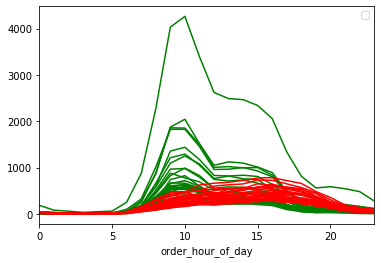

In [64]:
#orders_by_hours.plot()  # bad idea!
ax = plt.gca()
for product_name in early_products["product_name"]:
  orders_by_hours.plot(kind="line", y=product_name, color="green", ax=ax) 
for product_name in late_products["product_name"]:
  orders_by_hours.plot(kind="line", y=product_name, color="red", ax=ax) 
plt.legend("")
plt.show()

In [0]:
# probably needs to drop the outliers?

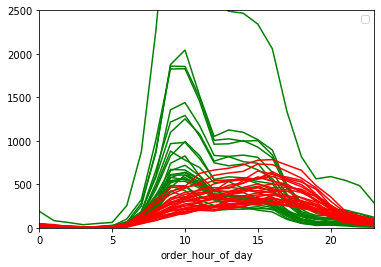

In [66]:
ax = plt.gca()

for product_name in early_products["product_name"]:
  orders_by_hours.plot(kind="line", y=product_name, color="green", ax=ax) 
for product_name in late_products["product_name"]:
  orders_by_hours.plot(kind="line", y=product_name, color="red", ax=ax) 
plt.legend("")
plt.ylim(0, 2500)
plt.show()

In [0]:
# still not exactly what I wanted

In [0]:
non_outliers = orders_by_hours.sum().sort_values(ascending=False)[5:].index
# here we have a series of the non-outliers

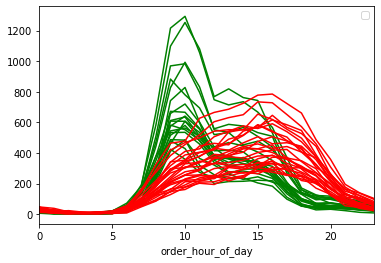

In [69]:
ax = plt.gca()

for product_name in early_products["product_name"]:
  if product_name not in non_outliers:
    continue
  orders_by_hours.plot(kind="line", y=product_name, color="green", ax=ax) 
for product_name in late_products["product_name"]:
  if product_name not in non_outliers:
    continue
  orders_by_hours.plot(kind="line", y=product_name, color="red", ax=ax) 
plt.legend("")
plt.show()

In [0]:
# there we have it! But, it's not orders as a percentage.

In [133]:
percent_orders_by_hours = orders_by_hours/orders_by_hours.sum()
percent_orders_by_hours.head()

product_name,0% Greek Strained Yogurt,Americone Dream® Ice Cream,Apples,Birthday Cake Light Ice Cream,Caramel Cookie Crunch Gelato,Cheez-It Baked Snack Crackers,Cheez-It Cheddar Cracker,Cherry Garcia Ice Cream,Chocolate Chip Cookie Dough Ice Cream,Chocolate Peanut Butter Cup Gelato,Chocolate Peanut Butter Ice Cream,Cinnamon Brown Sugar Breakfast Biscuits,Clementines,Coconut Almond Minis Frozen Dessert Bars,Coffee Ice Cream,Crunchy Oats 'n Honey Granola Bars,Dry Roasted Almonds,Extra Fancy Unsalted Mixed Nuts,French Vanilla Coffee Creamer,Half And Half Cream,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt,Half Baked® Ice Cream,Mediterranean Mint Gelato,Milk Chocolate Almonds,Milk and Cookies Ice Cream,Mint Chip,Mint Chocolate Chip Ice Cream,Nutri Grain Bars Multi Pack,Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage,Original Almondmilk,Original Beef Jerky,Original Rice Krispies Treats,Phish Food® Ice Cream,Pink Lady Apples,Popcorn,Pub Mix,Rising Crust Pepperoni Pizza,Roman Raspberry Sorbetto,Sea Salt Caramel Gelato,Sicilian Pistachio,Strawberry Ice Cream,Sweet & Salty Nut Granola Bars Peanut,The Tonight Dough™ Ice Cream,Trail Mix,Vanilla Bean Ice Cream,Vanilla Bean Light Ice Cream,Vanilla Milk Chocolate Almond Ice Cream Bars,Zero Calorie Cola,with Crispy Almonds Cereal
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003516,0.005274,0.003803,0.005676,0.006297,0.003006,0.006063,0.009344,0.005494,0.005320,0.007665,0.004089,0.005871,0.007225,0.006851,0.003413,0.003627,0.003589,0.002571,0.004459,0.002003,0.005364,0.007072,0.006008,0.003789,0.007658,0.007494,0.006428,0.002703,0.005689,0.006504,0.002986,0.003696,0.005666,0.003630,0.003943,0.004465,0.002848,0.005977,0.005736,0.009854,0.005617,0.002305,0.005738,0.002778,0.005814,0.008438,0.007692,0.003818,0.007122
1,0.001685,0.004188,0.002251,0.003479,0.003848,0.001503,0.002919,0.003115,0.004442,0.001773,0.004654,0.001091,0.002578,0.003468,0.005329,0.001982,0.001319,0.001994,0.001607,0.003229,0.000334,0.002682,0.004018,0.002612,0.002842,0.004021,0.003747,0.003074,0.002162,0.001659,0.003147,0.001941,0.002541,0.001889,0.003630,0.001408,0.001116,0.002330,0.003146,0.003155,0.003814,0.004213,0.001153,0.002550,0.001905,0.003445,0.003336,0.003030,0.003032,0.001113
2,0.001026,0.001396,0.001630,0.002929,0.001399,0.000752,0.002021,0.002225,0.001753,0.000665,0.003011,0.001636,0.001926,0.003179,0.002537,0.001542,0.000659,0.000598,0.003213,0.002460,0.000334,0.002682,0.002089,0.001176,0.001326,0.001915,0.001533,0.001677,0.001892,0.001659,0.001679,0.000896,0.002310,0.000630,0.001720,0.001126,0.000893,0.002330,0.002517,0.001004,0.004450,0.002653,0.001383,0.000956,0.000476,0.001938,0.004513,0.003497,0.001572,0.001558
3,0.000879,0.000776,0.000466,0.001648,0.001224,0.000251,0.001572,0.001335,0.001169,0.001330,0.002737,0.001363,0.001149,0.002601,0.001522,0.000881,0.001319,0.000897,0.001285,0.001076,NaN,0.001006,0.000804,0.001698,0.001326,0.001149,0.001363,0.001397,0.000541,0.000711,0.000839,0.000448,0.002079,0.000944,0.001337,0.000141,0.000447,0.001553,0.001258,0.001578,0.002543,0.001872,0.000461,0.002869,0.000476,0.000646,0.002551,0.001865,0.000786,0.001558
4,0.001026,0.001086,0.000854,0.001282,0.002449,0.000752,0.000898,0.002002,0.001636,0.001773,0.003559,NaN,0.001584,0.001734,0.002537,0.000661,0.000989,0.000798,0.001607,0.001076,0.000334,0.000670,0.001446,0.000914,0.000379,0.001723,0.001533,0.001118,0.000270,0.000711,0.003147,0.000299,0.000924,0.001574,0.001337,0.000845,0.001116,0.001294,0.002517,0.001721,0.002861,0.000936,0.001153,0.000956,0.000952,0.001723,0.001177,0.001632,0.001235,0.001335


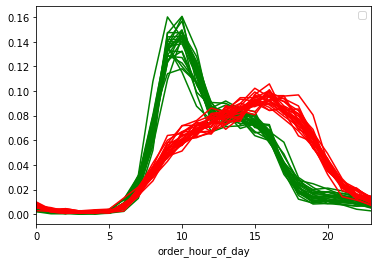

In [145]:
ax = plt.gca()
for product_name in early_products["product_name"]:
  percent_orders_by_hours.plot(kind="line", y=product_name, color="green", ax=ax) 
for product_name in late_products["product_name"]:
  percent_orders_by_hours.plot(kind="line", y=product_name, color="red", ax=ax) 
plt.legend("")
plt.show()

In [0]:
# Replicate parts of the other visualization from Instacart's blog post, showing "Number of Purchases" vs "Percent Reorder Purchases"

In [71]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [81]:
num_orders = order_products.pivot_table(values="order_id", index="product_id", aggfunc=len)
num_orders.columns=["num_orders"]
num_orders.head()

,num_orders
product_id,
1,1928
2,94
3,283
4,351
5,16


In [82]:
merged = products.merge(num_orders, how="inner", on="product_id")
merged.head()

,product_id,product_name,aisle_id,department_id,num_orders
0,1,Chocolate Sandwich Cookies,61,19,1928
1,2,All-Seasons Salt,104,13,94
2,3,Robust Golden Unsweetened Oolong Tea,94,7,283
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,351
4,5,Green Chile Anytime Sauce,5,13,16


In [97]:
merged = merged.pivot_table(values="num_orders", index="aisle_id", aggfunc=np.sum)
merged.head()

,num_orders
aisle_id,
1,74864
2,86364
3,473835
4,210604
5,65415


In [86]:
num_reordered = order_products.pivot_table(values="reordered", index="product_id", aggfunc=np.sum)
num_reordered.columns=["num_reorders"]
num_reordered.head()

,num_reorders
product_id,
1,1185
2,13
3,209
4,161
5,10


In [89]:
merged2 = products.merge(num_reordered, how="inner", on="product_id")
merged2.head()

,product_id,product_name,aisle_id,department_id,num_reorders
0,1,Chocolate Sandwich Cookies,61,19,1185
1,2,All-Seasons Salt,104,13,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7,209
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,161
4,5,Green Chile Anytime Sauce,5,13,10


In [90]:
merged2 = merged2.pivot_table(values="num_reorders", index="aisle_id", aggfunc=np.sum)
merged2.head()

,num_reorders
aisle_id,
1,44666
2,42297
3,283351
4,103244
5,18402


In [98]:
merged["percent_reorders"] = merged2["num_reorders"]/merged["num_orders"]
merged.head()

,num_orders,percent_reorders
aisle_id,,
1,74864,0.596629
2,86364,0.489753
3,473835,0.597995
4,210604,0.490228
5,65415,0.281312


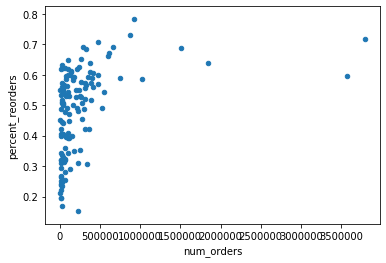

In [96]:
merged.plot.scatter(x="num_orders", y="percent_reorders")

In [0]:
# Get the most recent order for each user in Instacart's dataset. This is a useful baseline when predicting a user's next order

In [146]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [148]:
orders.head(50)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [151]:
latest_orders = orders.pivot_table(values="order_number", index="user_id", aggfunc=np.max)
latest_orders.head()

,order_number
user_id,
1,11
2,15
3,13
4,6
5,5


In [152]:
latest_orders.merge(orders, how="inner", on=["user_id", "order_number"])

,user_id,order_number,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order
0,1,11,1187899,train,4,8,14.0
1,2,15,1492625,train,1,11,30.0
2,3,13,2774568,test,5,15,11.0
3,4,6,329954,test,3,12,30.0
4,5,5,2196797,train,0,11,6.0
...,...,...,...,...,...,...,...
206204,206205,4,1716008,train,1,16,10.0
206205,206206,68,1043943,test,0,20,0.0
206206,206207,17,2821651,test,2,13,14.0
206207,206208,50,803273,test,5,11,4.0


In [0]:
# ^^ latest orders from each user